Regression Models

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Step 1: Load the Dataset
# Load the dataset from the CSV file
data = pd.read_csv("taxi_trip_pricing.csv")

In [3]:
# Step 2: Data Cleaning and Preprocessing
# Inspect the dataset
print("Dataset Overview:")
print(data.head())

Dataset Overview:
   Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
0             19.35     Morning     Weekday              3.0   
1             47.59   Afternoon     Weekday              1.0   
2             36.87     Evening     Weekend              1.0   
3             30.33     Evening     Weekday              4.0   
4               NaN     Evening     Weekday              3.0   

  Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                Low   Clear       3.56         0.80             0.32   
1               High   Clear        NaN         0.62             0.43   
2               High   Clear       2.70         1.21             0.15   
3                Low     NaN       3.48         0.51             0.15   
4               High   Clear       2.93         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  
0                  53.82     36.2624  
1                  40.57         NaN  
2                  37.27     52.9032  
3 

In [4]:
import dtale

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [6]:
data_show = dtale.show(data)

In [7]:
data_show.open_browser()

In [80]:
data_show.kill()


2025-01-22 20:29:39,131 - INFO     - Executing shutdown...
2025-01-22 20:29:39,137 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


Dealing with outlyers

In [8]:
# Step 1: Calculate the first and third quartile
Q1 = data['Trip_Distance_km'].quantile(0.25, interpolation='nearest')
Q2=data['Trip_Distance_km'].quantile(0.5,interpolation='nearest')
Q3= data['Trip_Distance_km'].quantile(0.75,interpolation='nearest')

# Step 2 Calculate the IQR
IQR = Q3 - Q1

# Step 3 Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"here are the lower bound and uper bound {lower_bound} {upper_bound}" )
# Step 4 Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {data[(data['Trip_Distance_km'] < lower_bound) | (data['Trip_Distance_km'] > upper_bound)]}")
print("----------------------------------------")
# Step 5 Remove the outliers
data['Trip_Distance_km'] = data['Trip_Distance_km'].apply(lambda x: Q2 if x <lower_bound or x>upper_bound else x)

# Step 6 Print the data without outliers
print(f"Here is the data without outliers:\n {data}")

here are the lower bound and uper bound -26.055 77.105
Here are the outliers based on the IQR threshold:
      Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
22         105.943550       Night     Weekend              2.0   
27         138.098328     Evening     Weekend              4.0   
64         146.067047   Afternoon     Weekday              2.0   
108        112.830958   Afternoon     Weekday              2.0   
110        102.747556     Evening     Weekday              2.0   
141        109.616082   Afternoon     Weekday              4.0   
225        130.809001   Afternoon     Weekday              1.0   
267        116.196064   Afternoon     Weekend              4.0   
268        139.062230   Afternoon     Weekday              2.0   
287        100.380420   Afternoon     Weekday              3.0   
302        145.747060     Morning     Weekday              3.0   
338        116.667681     Morning     Weekday              2.0   
410        104.371791         NaN   

In [9]:
# Step 1: Calculate the first and third quartile
Q1 = data['Trip_Price'].quantile(0.25, interpolation='nearest')
Q2=data['Trip_Price'].quantile(0.5,interpolation='nearest')
Q3= data['Trip_Price'].quantile(0.75,interpolation='nearest')

# Step 2 Calculate the IQR
IQR = Q3 - Q1

# Step 3 Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"here are the lower bound and uper bound {lower_bound} {upper_bound}" )
# Step 4 Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {data[(data['Trip_Price'] < lower_bound) | (data['Trip_Price'] > upper_bound)]}")
print("----------------------------------------")
# Step 5 Remove the outliers
data['Trip_Price'] = data['Trip_Price'].apply(lambda x: Q2 if x <lower_bound or x>upper_bound else x)

# Step 6 Print the data without outliers
print(f"Here is the data without outliers:\n {data}")

here are the lower bound and uper bound -19.134600000000013 121.88860000000003
Here are the outliers based on the IQR threshold:
      Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
22              25.79       Night     Weekend              2.0   
27              25.79     Evening     Weekend              4.0   
64              25.79   Afternoon     Weekday              2.0   
108             25.79   Afternoon     Weekday              2.0   
110             25.79     Evening     Weekday              2.0   
141             25.79   Afternoon     Weekday              4.0   
225             25.79   Afternoon     Weekday              1.0   
267             25.79   Afternoon     Weekend              4.0   
268             25.79   Afternoon     Weekday              2.0   
287             25.79   Afternoon     Weekday              3.0   
302             25.79     Morning     Weekday              3.0   
338             25.79     Morning     Weekday              2.0   
410         

Imputting missing values

In [10]:
# check the missing values
data.isnull().sum().sort_values(ascending=False)

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Imputer for numerical columns
numerical_imputer = IterativeImputer(max_iter=10)

# Imputer for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Columns for numeric imputation
numerical_columns = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 
                     'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 
                     'Trip_Price']

# Columns for categorical imputation
categorical_columns = ['Time_of_Day', 'Day_of_Week',  
                       'Traffic_Conditions', 'Weather']

for col in categorical_columns:
   data[[col]] = categorical_imputer.fit_transform(data[[col]]) 


In [12]:
# Loop to impute each column
for col in numerical_columns:
    data[col] = numerical_imputer.fit_transform(data[[col]])   
      
 
# check the missing values
data.isnull().sum().sort_values(ascending=False)

Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
dtype: int64

In [13]:
# Dictionary to store LabelEncoders for each column
label_encoders = {}

# Apply LabelEncoder to categorical columns
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,2,0,3.0,1,0,3.560000,0.80,0.32,53.82,36.262400
1,47.590000,0,0,1.0,0,0,3.502989,0.62,0.43,40.57,51.646208
2,36.870000,1,1,1.0,0,0,2.700000,1.21,0.15,37.27,52.903200
3,30.330000,1,0,4.0,1,0,3.480000,0.51,0.15,116.81,36.469800
4,25.073368,1,0,3.0,0,0,2.930000,0.63,0.32,22.64,15.618000


multiple regression

In [14]:
# Selecting features for multiple regression
X_multiple = data[['Trip_Distance_km', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes']]

In [15]:
# Target variable
y = data['Trip_Price']

In [16]:
# ## Step 3: Implement Multiple Regression
# Splitting the data into training and testing sets
X_train_mult, X_test_mult, y_train_mult, y_test_mult = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

In [17]:
# Creating and training the multiple regression model
model_multiple = LinearRegression()
model_multiple.fit(X_train_mult, y_train_mult)

LinearRegression()

In [18]:
# Predicting on the test data
y_pred_multiple = model_multiple.predict(X_test_mult)

In [19]:
# Calculating metrics for multiple regression
mse_multiple = mean_squared_error(y_test_mult, y_pred_multiple)
r2_multiple = r2_score(y_test_mult, y_pred_multiple)

In [20]:
print("\n### Multiple Regression Results ###")
print(f"Mean Squared Error (MSE): {mse_multiple}")
print(f"R^2 Score: {r2_multiple}")


### Multiple Regression Results ###
Mean Squared Error (MSE): 106.58857963965416
R^2 Score: 0.8009199178145059


Linear Regression 

In [21]:
# ## Step 4: Implement Simple Linear Regression
# Selecting a single feature for simple regression (Trip_Distance_km)
X_simple = data[['Trip_Distance_km']]

In [22]:
# Splitting the data into training and testing sets
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.2, random_state=42)

In [24]:
# Creating and training the simple regression model
model_simple = LinearRegression()
model_simple.fit(X_train_simple, y_train_simple)

LinearRegression()

In [25]:
# Predicting on the test data
y_pred_simple = model_simple.predict(X_test_simple)

In [26]:
# Calculating metrics for simple regression
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

In [27]:
print("\n### Simple Linear Regression Results ###")
print(f"Mean Squared Error (MSE): {mse_simple}")
print(f"R^2 Score: {r2_simple}")


### Simple Linear Regression Results ###
Mean Squared Error (MSE): 324.04652265463
R^2 Score: 0.39476434923796266


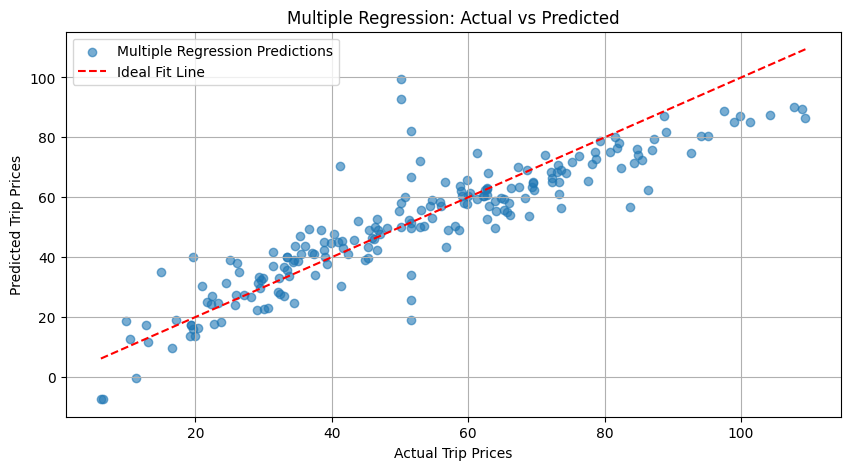

In [28]:
# ## Step 5: Visualizing Results
# Plotting predictions vs actual for multiple regression
plt.figure(figsize=(10, 5))
plt.scatter(y_test_mult, y_pred_multiple, alpha=0.6, label='Multiple Regression Predictions')
plt.plot([y_test_mult.min(), y_test_mult.max()], [y_test_mult.min(), y_test_mult.max()], 'r--', label='Ideal Fit Line')
plt.xlabel("Actual Trip Prices")
plt.ylabel("Predicted Trip Prices")
plt.title("Multiple Regression: Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()

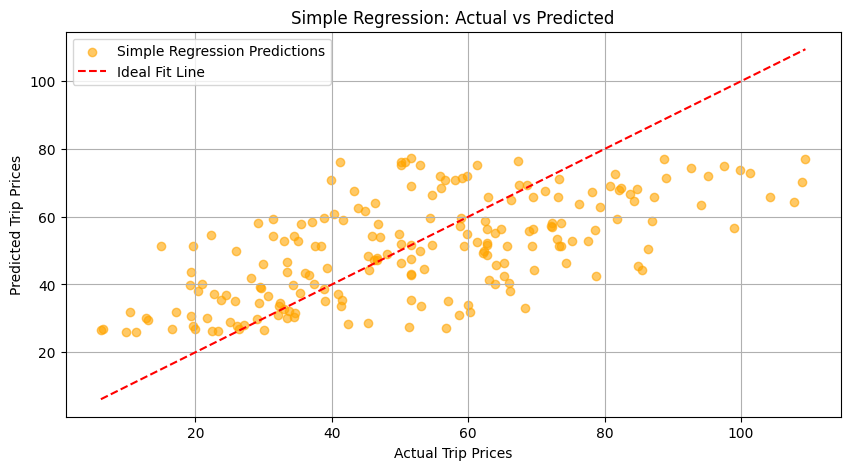

In [29]:
# Plotting predictions vs actual for simple regression
plt.figure(figsize=(10, 5))
plt.scatter(y_test_simple, y_pred_simple, alpha=0.6, label='Simple Regression Predictions', color='orange')
plt.plot([y_test_simple.min(), y_test_simple.max()], [y_test_simple.min(), y_test_simple.max()], 'r--', label='Ideal Fit Line')
plt.xlabel("Actual Trip Prices")
plt.ylabel("Predicted Trip Prices")
plt.title("Simple Regression: Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()

In [30]:
# ## Step 6: Compare Performance
print("\n### Comparison of Multiple Regression vs Simple Regression ###")
print(f"Multiple Regression MSE: {mse_multiple}, R^2: {r2_multiple}")
print(f"Simple Regression MSE: {mse_simple}, R^2: {r2_simple}")


### Comparison of Multiple Regression vs Simple Regression ###
Multiple Regression MSE: 106.58857963965416, R^2: 0.8009199178145059
Simple Regression MSE: 324.04652265463, R^2: 0.39476434923796266


In [31]:
if r2_multiple > r2_simple:
    print("\nMultiple Regression performs better than Simple Linear Regression.")
else:
    print("\nSimple Linear Regression performs better than Multiple Regression.")


Multiple Regression performs better than Simple Linear Regression.


performing inverse transformation and saving the preprocessed data

In [32]:
# Inverse transform for encoded columns
for col in categorical_columns:
    # Retrieve the corresponding LabelEncoder for the column
    le = label_encoders[col]
    # Inverse transform the data and convert to integer type
    data[col] = le.inverse_transform(data[col].astype(int))
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.262400
1,47.590000,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.43,40.57,51.646208
2,36.870000,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,52.903200
3,30.330000,Evening,Weekday,4.0,Low,Clear,3.480000,0.51,0.15,116.81,36.469800
4,25.073368,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,15.618000


In [33]:
data.to_csv('Preprocessed_Data_of_Taxi_trip_pricing.csv')